In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, cross_validate, GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Clean

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/ryskgit/QTW_CaseStudy/main/Case%20Study%201/Raw%20Data%201/train.csv')
material = pd.read_csv('https://raw.githubusercontent.com/ryskgit/QTW_CaseStudy/main/Case%20Study%201/Raw%20Data%201/unique_m.csv')
train.drop(columns="critical_temp", inplace=True)
df = pd.concat([train, material], axis=1)
df.drop(columns='material', inplace=True)

# same way with pd.merge()
# df = pd.merge(train, material, left_index=True, right_index=True)
# df.drop(columns=["critical_temp_y", "material"], inplace=True)
# df.rename(columns={"critical_temp_x":"critical_temp"}, inplace=True)

In [3]:
single_vals = df.columns[df.eq(df.iloc[0]).all()].tolist()
print(f"There are {len(single_vals)} columns with single values: {single_vals}")
print(f"Original data dimiension: {df.shape}")
df.drop(columns=single_vals, inplace=True)
print(f"Final data dim after dropping aforementioned columns: {df.shape}")
print(f"There are {df.isna().sum().sum()} NA values and {df.duplicated().sum()} duplicated records")

There are 9 columns with single values: ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn']
Original data dimiension: (21263, 168)
Final data dim after dropping aforementioned columns: (21263, 159)
There are 0 NA values and 0 duplicated records


In [4]:
df.dtypes.value_counts()

float64    156
int64        3
dtype: int64

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,1.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,1.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
2,4,88.944468,57.885242,66.361592,36

In [7]:
pd.reset_option("max_columns")

# EDA

In [43]:
# Dimensions
df.shape

(21263, 159)

In [44]:
# Summary Statistics
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,0.038206,0.022512,0.061558,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.177476,0.282265,0.864859,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,97.240000,10.000000,45.000000,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,185.000000


In [45]:
# Make copy to exclude Element variables
df2 = df.copy()


In [46]:
# Create subset excluding elemnent variables
df2_sub = df2.iloc[:, :81]

array([[<AxesSubplot:title={'center':'number_of_elements'}>,
        <AxesSubplot:title={'center':'mean_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_mean_atomic_mass'}>,
        <AxesSubplot:title={'center':'gmean_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_gmean_atomic_mass'}>,
        <AxesSubplot:title={'center':'entropy_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_entropy_atomic_mass'}>,
        <AxesSubplot:title={'center':'range_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_range_atomic_mass'}>],
       [<AxesSubplot:title={'center':'std_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_std_atomic_mass'}>,
        <AxesSubplot:title={'center':'mean_fie'}>,
        <AxesSubplot:title={'center':'wtd_mean_fie'}>,
        <AxesSubplot:title={'center':'gmean_fie'}>,
        <AxesSubplot:title={'center':'wtd_gmean_fie'}>,
        <AxesSubplot:title={'center':'entropy_fie'}>,
        <AxesSubplot:title={'center':'wtd_entropy_fi

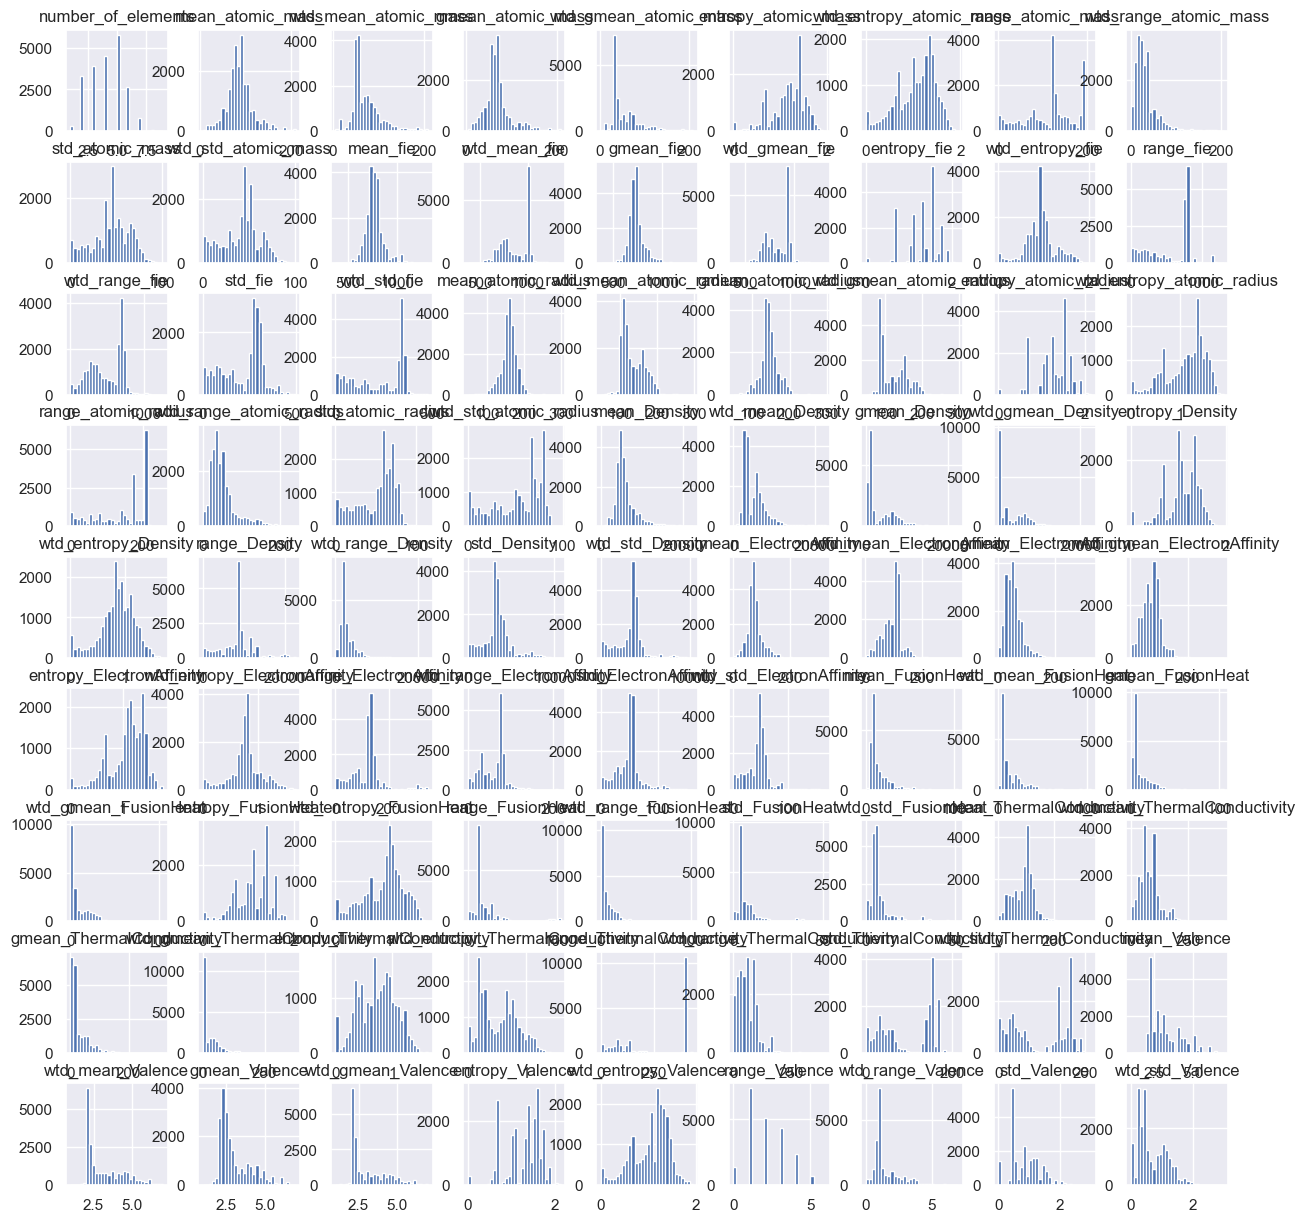

In [61]:
# Histogram plots at a glance
df2_sub.hist(bins=30, figsize=(15, 15))

In [82]:
skews = {}
for i in df2_sub:
    if df2_sub[i].skew() > 1:
        skews[i] = df2_sub[i].skew()

skews_list = sorted(skews.items(), key = lambda x:x[1])
skews_dict = dict(skews_list)
print(skews_dict)
print(len(skews_dict))

{'mean_Valence': 1.0036311156826094, 'mean_fie': 1.0097642804575013, 'wtd_gmean_Valence': 1.016800042667828, 'mean_ElectronAffinity': 1.098437437881419, 'gmean_Valence': 1.168452839270026, 'gmean_fie': 1.1919286264562292, 'gmean_ElectronAffinity': 1.3497357705423985, 'wtd_mean_ThermalConductivity': 1.379703282816514, 'wtd_range_ThermalConductivity': 1.4159181865406287, 'gmean_atomic_mass': 1.474815716460679, 'wtd_mean_atomic_mass': 1.5039066527525748, 'wtd_range_Valence': 1.547605067282474, 'wtd_range_atomic_radius': 1.6431624609037285, 'wtd_gmean_Density': 1.6509298548729714, 'gmean_Density': 1.6591282559918126, 'wtd_gmean_atomic_mass': 1.6982799470264727, 'mean_Density': 2.103343841114579, 'wtd_mean_Density': 2.1377633652220895, 'gmean_ThermalConductivity': 2.3399514687914174, 'wtd_range_atomic_mass': 2.463807863929849, 'wtd_gmean_FusionHeat': 2.4875423104652383, 'mean_FusionHeat': 2.52278188047039, 'wtd_gmean_ThermalConductivity': 2.5883047943944177, 'gmean_FusionHeat': 2.6654771978

In [86]:
# Columns with greatest amount of skew (30)
skew_keys = skews_dict.keys()
print(skew_keys)

dict_keys(['mean_Valence', 'mean_fie', 'wtd_gmean_Valence', 'mean_ElectronAffinity', 'gmean_Valence', 'gmean_fie', 'gmean_ElectronAffinity', 'wtd_mean_ThermalConductivity', 'wtd_range_ThermalConductivity', 'gmean_atomic_mass', 'wtd_mean_atomic_mass', 'wtd_range_Valence', 'wtd_range_atomic_radius', 'wtd_gmean_Density', 'gmean_Density', 'wtd_gmean_atomic_mass', 'mean_Density', 'wtd_mean_Density', 'gmean_ThermalConductivity', 'wtd_range_atomic_mass', 'wtd_gmean_FusionHeat', 'mean_FusionHeat', 'wtd_gmean_ThermalConductivity', 'gmean_FusionHeat', 'range_FusionHeat', 'wtd_mean_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat', 'wtd_range_Density', 'wtd_range_FusionHeat'])


In [58]:
# Iterate through correlations and print those with a corr > 0.8

rows, cols = df2_sub.shape
flds = list(df2_sub.columns)

corr = df2_sub.corr().values

corr_array = ([])

for i in range(cols):
    for j in range(i+1, cols):
        if abs(corr[i,j]) > 0.8:
            item = [flds[i],flds[j], corr[i,j]]
            corr_array.append(item)
            print(flds[i], ' ', flds[j], ' ', corr[i,j])

## code adapted from [https://stackoverflow.com/questions/34902649/how-do-i-loop-across-a-correlation-matrix-to-only-give-me-pairs-of-correlations]

number_of_elements   entropy_atomic_mass   0.9393040581921167
number_of_elements   wtd_entropy_atomic_mass   0.8818451500815254
number_of_elements   entropy_fie   0.9731953349512207
number_of_elements   entropy_atomic_radius   0.9722452445107387
number_of_elements   wtd_entropy_atomic_radius   0.904120681959218
number_of_elements   entropy_Density   0.8718317491451206
number_of_elements   entropy_ElectronAffinity   0.8773040201781258
number_of_elements   entropy_FusionHeat   0.900759345055335
number_of_elements   wtd_entropy_FusionHeat   0.8604788192885373
number_of_elements   entropy_Valence   0.9678324511717474
number_of_elements   wtd_entropy_Valence   0.8925594745140604
mean_atomic_mass   wtd_mean_atomic_mass   0.8159770344921294
mean_atomic_mass   gmean_atomic_mass   0.9402981628064275
wtd_mean_atomic_mass   gmean_atomic_mass   0.8482415287619522
wtd_mean_atomic_mass   wtd_gmean_atomic_mass   0.964085104577256
wtd_mean_atomic_mass   wtd_mean_Density   0.8426647013792126
gmean_atom

In [59]:
# 159 pairs displayed a correlation >0.8
len(corr_array)

159

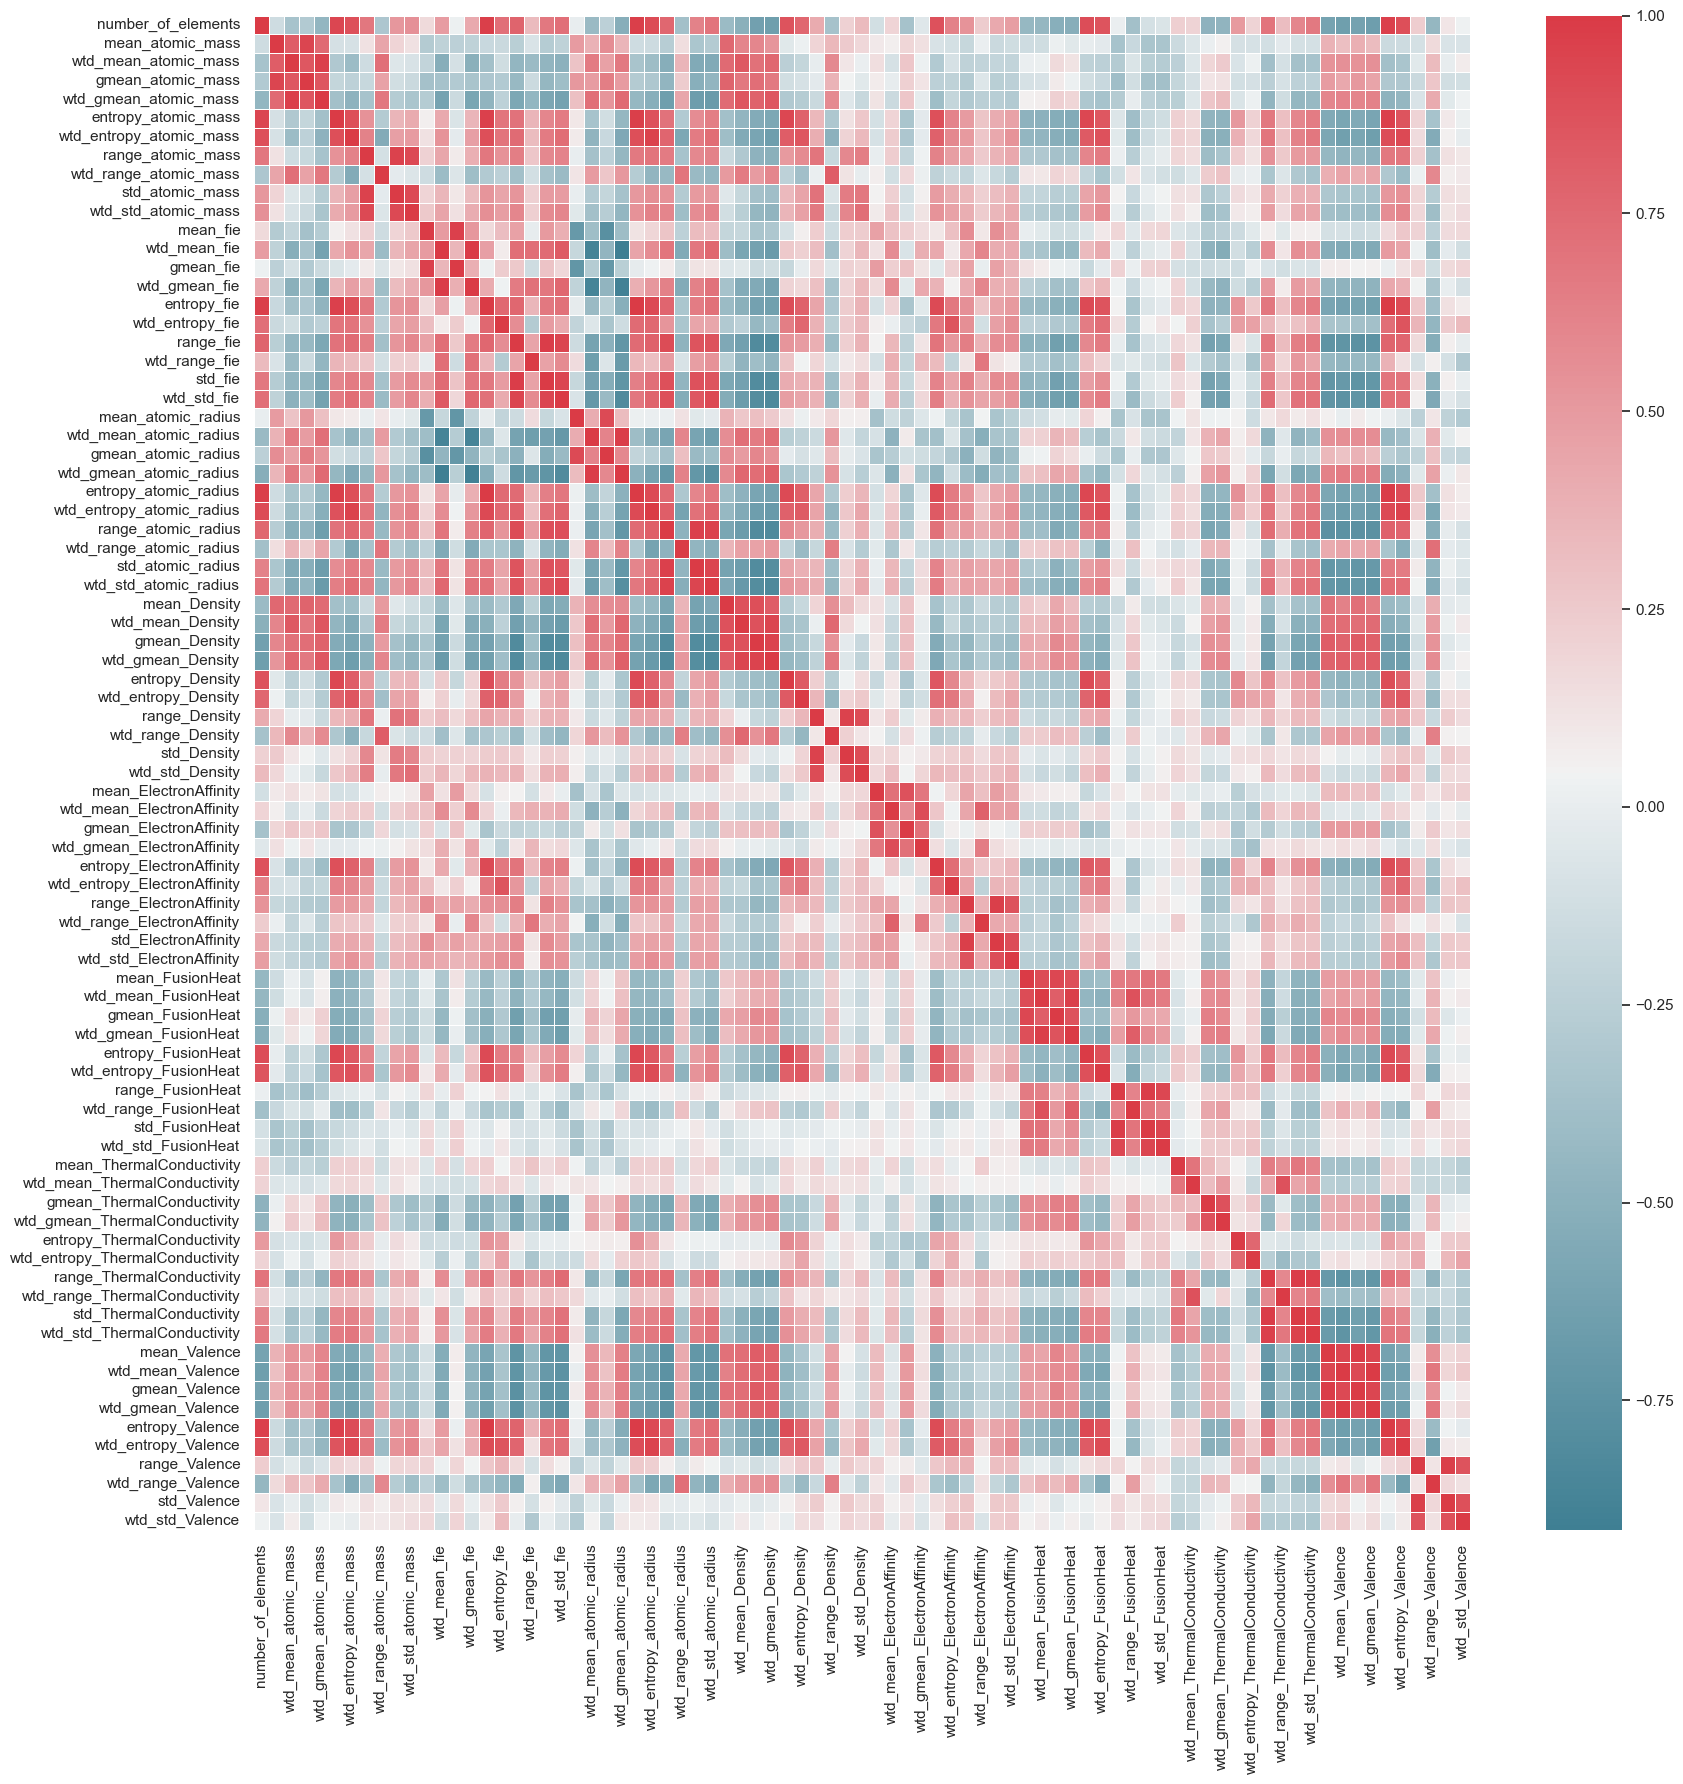

In [60]:
# Correlation Matrix
sns.set()
sns.set(style='darkgrid')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax= plt.subplots(figsize=(18,18))

sns.heatmap(df2_sub.corr(),cmap=cmap,fmt='.3f',linewidth=.5,ax=ax)
f.tight_layout()

In [36]:
import sweetviz as sv
report = sv.analyze(df2_sub)


/usr/local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:07 -> (00:00 left)


In [37]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [87]:
# run this chunk to view histograms of each feature
# commenting out bc output is too long
#for i in df2_sub.columns:
     #sns.displot(df2_sub[i], kde=True)
     #plt.show()

# Preprocess

After prelim eda, we see that normalcy is met thus standard scaler is the most useful scaler for this data. For completeness, we showed that the internal cross validation metrics between scaled and unscaled data are equivalent.

In [17]:
X = df.drop(columns="critical_temp")
y = df["critical_temp"]

## No scaling

In [18]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [19]:
split = KFold(shuffle=True, 
              n_splits=5, 
              random_state=77)
scoring = ["r2", "neg_root_mean_squared_error"]
scores = cross_validate(lr, X, y, 
                        cv=split,
                        scoring=scoring,
                        return_train_score=True,
                        return_estimator=True,
                        n_jobs=-1)
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,estimator,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,2.207908,0.022633,LinearRegression(),0.770972,0.762466,-16.308913,-16.715386
1,1.930513,0.160886,LinearRegression(),-0.364983,0.769668,-40.298407,-16.409987
2,2.443389,0.034596,LinearRegression(),0.750902,0.767497,-17.031445,-16.532009
3,2.083992,0.029698,LinearRegression(),0.317922,0.764245,-28.201902,-16.644465
4,1.874411,0.019847,LinearRegression(),0.756333,0.765512,-16.989078,-16.567076


In [20]:
# this shows the slopes of each feature from the first fit
# commenting out bc out is too long
# scores["estimator"][0].coef_

In [21]:
# 5 fold internal cv on full data
print("Nonscaled r2: %.5f" % scores["test_r2"].mean())
print("Nonscaled rmse: %.5f" % np.abs(scores["test_neg_root_mean_squared_error"].mean()))

Nonscaled r2: 0.44623
Nonscaled rmse: 23.76595


## Standard Scaler

In [22]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("lr", lr)
])
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [23]:
split = KFold(shuffle=True, 
              n_splits=5, 
              random_state=77)
scoring = ["r2", "neg_root_mean_squared_error"]
scale_scores = cross_validate(pipe, X, y, 
                        cv=split,
                        scoring=scoring,
                        return_train_score=True,
                        return_estimator=True,
                        n_jobs=-1)
scale_scores = pd.DataFrame(scale_scores)
scale_scores

,fit_time,score_time,estimator,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.844124,0.027862,"(StandardScaler(), LinearRegression())",0.770972,0.762466,-16.308913,-16.715386
1,0.838846,0.021192,"(StandardScaler(), LinearRegression())",-0.364983,0.769668,-40.298407,-16.409987
2,0.867989,0.024237,"(StandardScaler(), LinearRegression())",0.750902,0.767497,-17.031445,-16.532009
3,0.842512,0.035070,"(StandardScaler(), LinearRegression())",0.317922,0.764245,-28.201902,-16.644465
4,0.902183,0.019018,"(StandardScaler(), LinearRegression())",0.756333,0.765512,-16.989078,-16.567076


In [24]:
# 5 fold internal cv on full data
print("std scale r2: %.5f" % scores["test_r2"].mean())
print("std scale rmse: %.5f" % np.abs(scores["test_neg_root_mean_squared_error"].mean()))

std scale r2: 0.44623
std scale rmse: 23.76595


# Modeling

## L1 / Lasso Gridsearch

In [25]:
lasso_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ('model', Lasso(random_state=77))
])

params = {'model__alpha': (np.logspace(-1, 1, 200))} 
split = KFold(shuffle=True, 
              n_splits=5, 
              random_state=77)
scoring = ["neg_root_mean_squared_error", "r2"]
# scoring = {"R2": "r2", "RMSE": make_scorer("neg_root_mean_squared_error", greater_is_better=False)}


lasso_gs = GridSearchCV(lasso_pipe,
						param_grid=params,
						cv=split,
						scoring=scoring,
                        refit="neg_root_mean_squared_error",
						n_jobs=-1
)

In [26]:
lasso_gs.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=77, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso(random_state=77))]),
             n_jobs=-1,
             param_grid={'model__alpha': array([ 0.1       ,  0.10234114,  0.10473709,  0.10718913,  0.10969858,
        0.11226678,  0.1148951 ,  0.11758496,  0.12033778,  0.12315506,
        0.12603829,  0.12898903,  0.13200884,  0.13509935,  0.138262...
        5.11143348,  5.23109931,  5.35356668,  5.47890118,  5.60716994,
        5.73844165,  5.87278661,  6.01027678,  6.15098579,  6.29498899,
        6.44236351,  6.59318827,  6.74754405,  6.90551352,  7.06718127,
        7.2326339 ,  7.40196   ,  7.57525026,  7.75259749,  7.93409667,
        8.11984499,  8.30994195,  8.50448934,  8.70359136,  8.90735464,
        9.1158883 ,  9.32930403,  9.54771611,  9.77124154, 10.        ])},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'r2'])

In [27]:
lasso_results = pd.DataFrame(lasso_gs.cv_results_).sort_values("mean_test_neg_root_mean_squared_error", ascending=False)
lasso_results[
    [
        "mean_test_neg_root_mean_squared_error",
        "mean_test_r2",
        "param_model__alpha"
    ]
].head(5)

,mean_test_neg_root_mean_squared_error,mean_test_r2,param_model__alpha
130,-20.087865,0.655845,2.025502
129,-20.089264,0.655723,1.979167
131,-20.090978,0.655796,2.072922
128,-20.091017,0.655580,1.933892
127,-20.096490,0.655293,1.889652


### Feature importance

In [28]:
lasso_feat_imp = pd.DataFrame({"Parameter":lasso_gs.best_estimator_.named_steps["model"].coef_, "Feature":lasso_gs.best_estimator_[:-1].get_feature_names_out()}, 
                             index=lasso_gs.best_estimator_[:-1].get_feature_names_out()
)

In [29]:
lasso_feat_imp["Parameter_Rank"] = ((lasso_feat_imp["Parameter"].abs().to_numpy()*-1).argsort().argsort() + 1)
lasso_feat_imp = lasso_feat_imp.reindex(lasso_feat_imp["Parameter"].abs().sort_values(ascending=False).index)
lasso_feat_imp.reset_index(drop=True, inplace=True)
lasso_feat_imp.head(20)

,Parameter,Feature,Parameter_Rank
0,11.416835,wtd_std_ThermalConductivity,1
1,7.531124,Ba,2
2,3.185943,wtd_entropy_atomic_mass,3
3,3.115142,Ca,4
4,-2.097953,wtd_gmean_ElectronAffinity,5
5,-2.014136,wtd_std_Valence,6
6,1.686567,Bi,7
7,1.538015,range_atomic_radius,8
8,1.368411,range_fie,9
9,-1.269696,Si,10


## L2 / Ridge Gridsearch

In [30]:
ridge_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ('model', Ridge(random_state=77))
])

params = {'model__alpha': (np.logspace(-1, 2, 300))} 
split = KFold(shuffle=True, 
              n_splits=5, 
              random_state=77)
scoring = ["neg_root_mean_squared_error", "r2"]
# scoring = {"R2": "r2", "RMSE": make_scorer("neg_root_mean_squared_error", greater_is_better=False)}


ridge_gs = GridSearchCV(ridge_pipe,
						param_grid=params,
						cv=split,
						scoring=scoring,
                        refit="neg_root_mean_squared_error",
						n_jobs=-1
)

In [31]:
ridge_gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=77, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge(random_state=77))]),
             n_jobs=-1,
             param_grid={'model__alpha': array([  0.1       ,   0.10233718,   0.10472898,   0.10717669,
         0.1096816 ,   0.11224506,   0.11486843,   0.11755311,
         0.12030053,   0.12311217,   0.12598953,   0.12893413,
         0.13194755,   0.1350314 ,   0.1381873...
        58.78016072,  60.1539588 ,  61.55986501,  62.99862978,
        64.47102107,  65.9778248 ,  67.51984523,  69.09790546,
        70.71284779,  72.36553423,  74.05684692,  75.78768864,
        77.55898323,  79.37167617,  81.226735  ,  83.1251499 ,
        85.06793416,  87.05612479,  89.09078301,  91.17299485,
        93.30387173,  95.48455103,  97.71619673, 100.        ])},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'r2'])

In [32]:
ridge_results = pd.DataFrame(ridge_gs.cv_results_).sort_values("mean_test_neg_root_mean_squared_error", ascending=False)
ridge_results[
    [
        "mean_test_neg_root_mean_squared_error",
        "mean_test_r2",
        "param_model__alpha"
    ]
].head(5)

,mean_test_neg_root_mean_squared_error,mean_test_r2,param_model__alpha
299,-22.430580,0.533886,100.0
298,-22.434626,0.533604,97.716197
297,-22.438754,0.533319,95.484551
296,-22.442965,0.533029,93.303872
295,-22.447259,0.532734,91.172995


### Feature importance

In [33]:
ridge_feat_imp = pd.DataFrame({"Parameter":ridge_gs.best_estimator_.named_steps["model"].coef_, "Feature":ridge_gs.best_estimator_[:-1].get_feature_names_out()}, 
                             index=ridge_gs.best_estimator_[:-1].get_feature_names_out()
)

In [34]:
ridge_feat_imp["Parameter_Rank"] = ((ridge_feat_imp["Parameter"].abs().to_numpy()*-1).argsort().argsort() + 1)
ridge_feat_imp = ridge_feat_imp.reindex(ridge_feat_imp["Parameter"].abs().sort_values(ascending=False).index)
ridge_feat_imp.reset_index(drop=True, inplace=True)
ridge_feat_imp.head(20)

,Parameter,Feature,Parameter_Rank
0,14.107843,wtd_mean_ThermalConductivity,1
1,12.494664,std_ElectronAffinity,2
2,-9.661939,range_ElectronAffinity,3
3,8.592817,Ba,4
4,7.840255,range_atomic_mass,5
5,-7.663575,wtd_mean_atomic_mass,6
6,7.607960,wtd_std_ThermalConductivity,7
7,-7.507625,wtd_gmean_ElectronAffinity,8
8,-7.451777,wtd_gmean_ThermalConductivity,9
9,-7.024038,std_atomic_radius,10
